# Speech Emotion Recognition – Preprocessing
## Notebook 7: Feature Engineering (Statistical Summaries)

**Registraton Number:** IT24102784  
**Task:** Create new Statistical Features from existing Audio Features.  
**Objective:** Enhance the Dataset by adding Higher-Level Engineered Features that may improve Model Performance

### Step 1: Importing Libraries and Data Arrays
First, we need to import the necessary Libraries and Data Arrays of Extracted Features.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import OneHotEncoder

X = np.load("../results/features_and_labels/X_features.npy", allow_pickle=False)
y = np.load("../results/features_and_labels/y_labels.npy", allow_pickle=True)

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (2870, 116)
Labels shape: (2870,)


### Step 2: Convert Features into DataFrame

In [3]:
df = pd.DataFrame(X, columns=[f"F{i}" for i in range(1, (X.shape[1] + 1))])
df["Emotion"] = y
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F108,F109,F110,F111,F112,F113,F114,F115,F116,Emotion
0,-469.677063,33.594616,4.975258,8.371067,1.992480,-4.194683,-2.305305,-3.754504,-2.330569,4.608140,...,0.445539,0.191169,0.231488,0.221131,0.340141,0.170471,0.279709,0.381629,0.199950,neutral
1,-459.840088,33.337284,3.588513,10.999732,0.765450,-3.593445,-2.849192,-5.310829,-1.954750,4.414882,...,0.454025,0.193513,0.230735,0.219533,0.324711,0.168356,0.282292,0.410520,0.188443,neutral
2,-460.854553,35.502811,4.278590,8.724514,-0.171948,-2.784281,-3.759825,-4.420269,-3.023970,3.874425,...,0.460651,0.186819,0.225535,0.214604,0.338257,0.162786,0.264915,0.380400,0.208246,neutral
3,-455.989563,35.595882,5.115926,9.091783,0.802329,-1.342748,-3.980319,-4.840831,-1.725044,5.335970,...,0.476619,0.193392,0.240152,0.209993,0.328946,0.155799,0.264079,0.399235,0.209314,neutral
4,-484.466675,36.726303,6.566588,8.952496,1.008656,-3.470678,-4.511901,-3.212588,-4.341210,3.822065,...,0.440573,0.187168,0.231194,0.202355,0.320247,0.151997,0.260596,0.402678,0.173798,calm


### Step 3: Add Statistical Summary Features
- *Mean*  
- *Standard Deviation*  
- *Skewness*  
- *Kurtosis*

In [4]:
df["Feature Mean"] = df.drop(columns=["Emotion"]).mean(axis=1)
df["Feature Std"] = df.drop(columns=["Emotion"]).std(axis=1)
df["Feature Skewness"] = df.drop(columns=["Emotion"]).skew(axis=1)
df["Feature Kurtosis"] = df.drop(columns=["Emotion"]).kurt(axis=1)

df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F112,F113,F114,F115,F116,Emotion,Feature Mean,Feature Std,Feature Skewness,Feature Kurtosis
0,-469.677063,33.594616,4.975258,8.371067,1.992480,-4.194683,-2.305305,-3.754504,-2.330569,4.608140,...,0.340141,0.170471,0.279709,0.381629,0.199950,neutral,-3.913586,43.567997,-10.608886,115.339104
1,-459.840088,33.337284,3.588513,10.999732,0.765450,-3.593445,-2.849192,-5.310829,-1.954750,4.414882,...,0.324711,0.168356,0.282292,0.410520,0.188443,neutral,-3.866359,42.661442,-10.601458,115.230209
2,-460.854553,35.502811,4.278590,8.724514,-0.171948,-2.784281,-3.759825,-4.420269,-3.023970,3.874425,...,0.338257,0.162786,0.264915,0.380400,0.208246,neutral,-3.876394,42.764576,-10.593770,115.130852
3,-455.989563,35.595882,5.115926,9.091783,0.802329,-1.342748,-3.980319,-4.840831,-1.725044,5.335970,...,0.328946,0.155799,0.264079,0.399235,0.209314,neutral,-3.783409,42.322830,-10.590260,115.078339
4,-484.466675,36.726303,6.566588,8.952496,1.008656,-3.470678,-4.511901,-3.212588,-4.341210,3.822065,...,0.320247,0.151997,0.260596,0.402678,0.173798,calm,-4.061332,44.953968,-10.596217,115.174690


### Step 4: Correlation Heatmap of Engineered Features

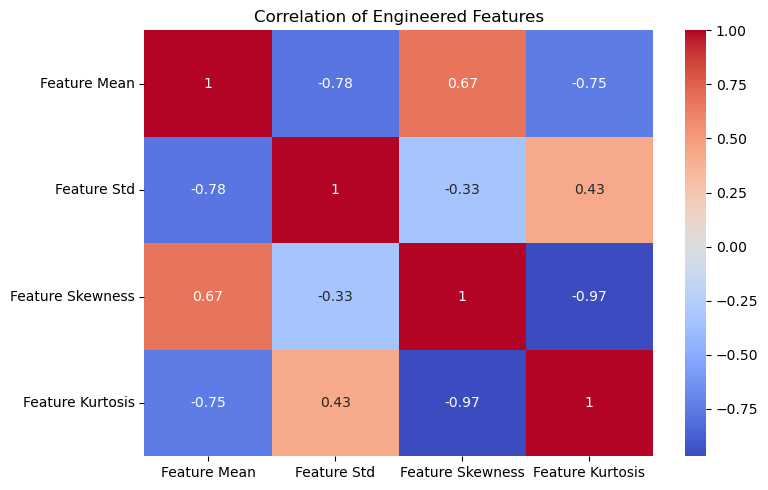

In [5]:
plt.figure(figsize=(8,5))
sns.heatmap(df[["Feature Mean","Feature Std","Feature Skewness","Feature Kurtosis"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Engineered Features")
plt.tight_layout()
plt.show()

### Step 5: Compare Distributions Across Emotions

##### Distribution of **Feature Mean** for each emotion using a `Box Plot`.

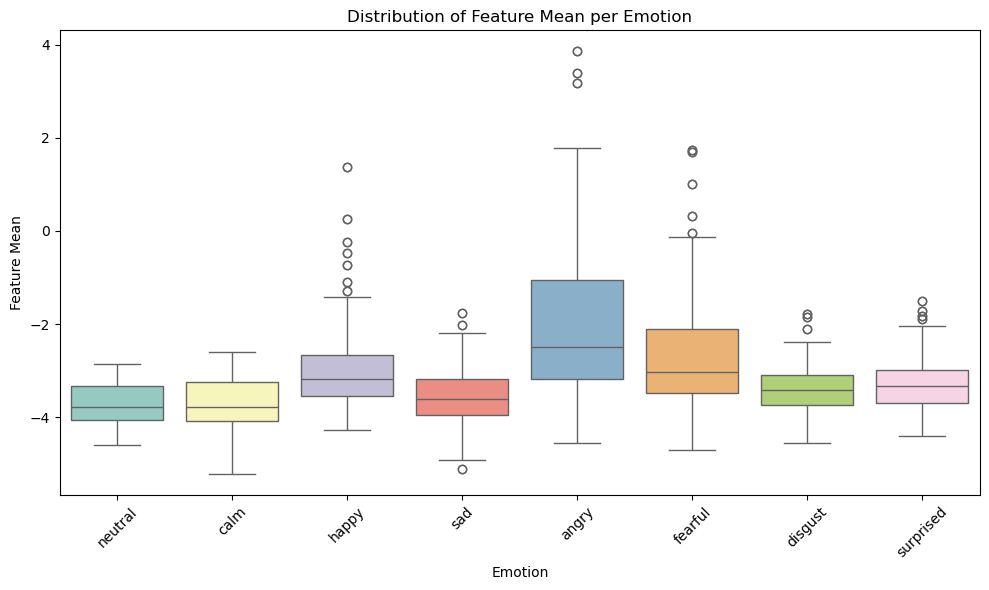

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Emotion", y="Feature Mean", hue="Emotion", data=df, palette="Set3", legend=False)
plt.title("Distribution of Feature Mean per Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Distribution of **Feature Std** for each emotion using a `Density Plot`.

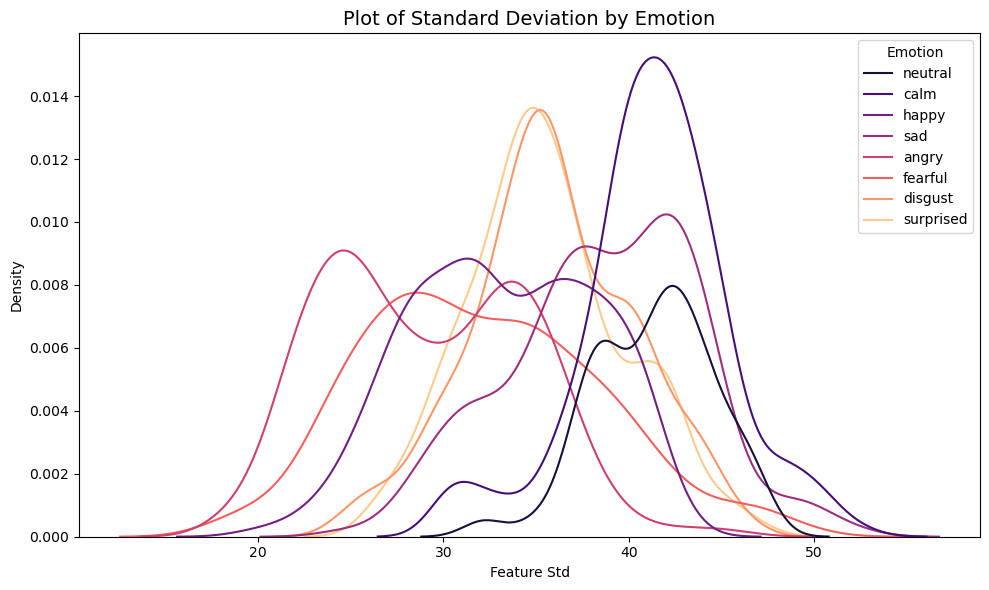

In [7]:
plt.figure(figsize=(10,6))
sns.kdeplot(x='Feature Std', hue="Emotion", data=df, palette='magma')
plt.title('Plot of Standard Deviation by Emotion', fontsize=14)
plt.tight_layout()
plt.show()

##### Distribution of **Feature Skewness** for each emotion using a `Density Plot`.

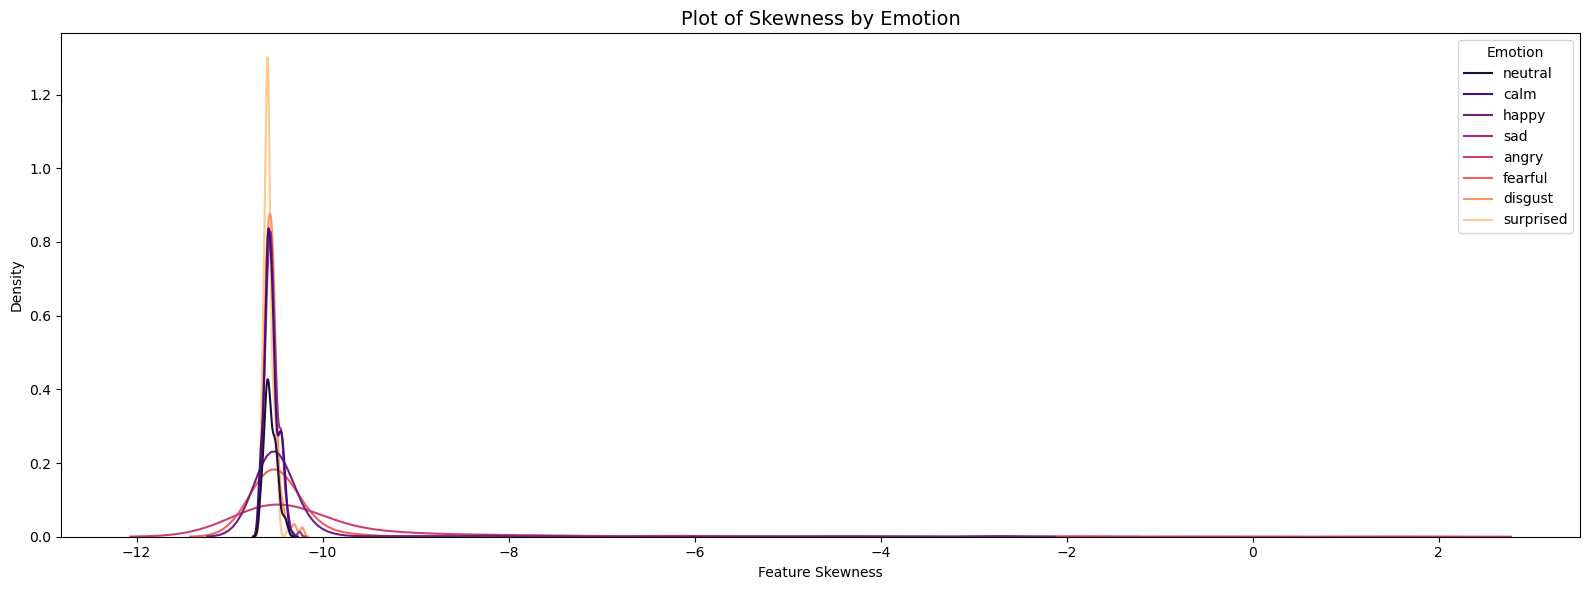

In [8]:
plt.figure(figsize=(16,6))
sns.kdeplot(x='Feature Skewness', hue="Emotion", data=df, palette='magma')
plt.title('Plot of Skewness by Emotion', fontsize=14)
plt.tight_layout()
plt.show()

##### Distribution of **Feature Kurtosis** for each emotion using a `Density Plot`.

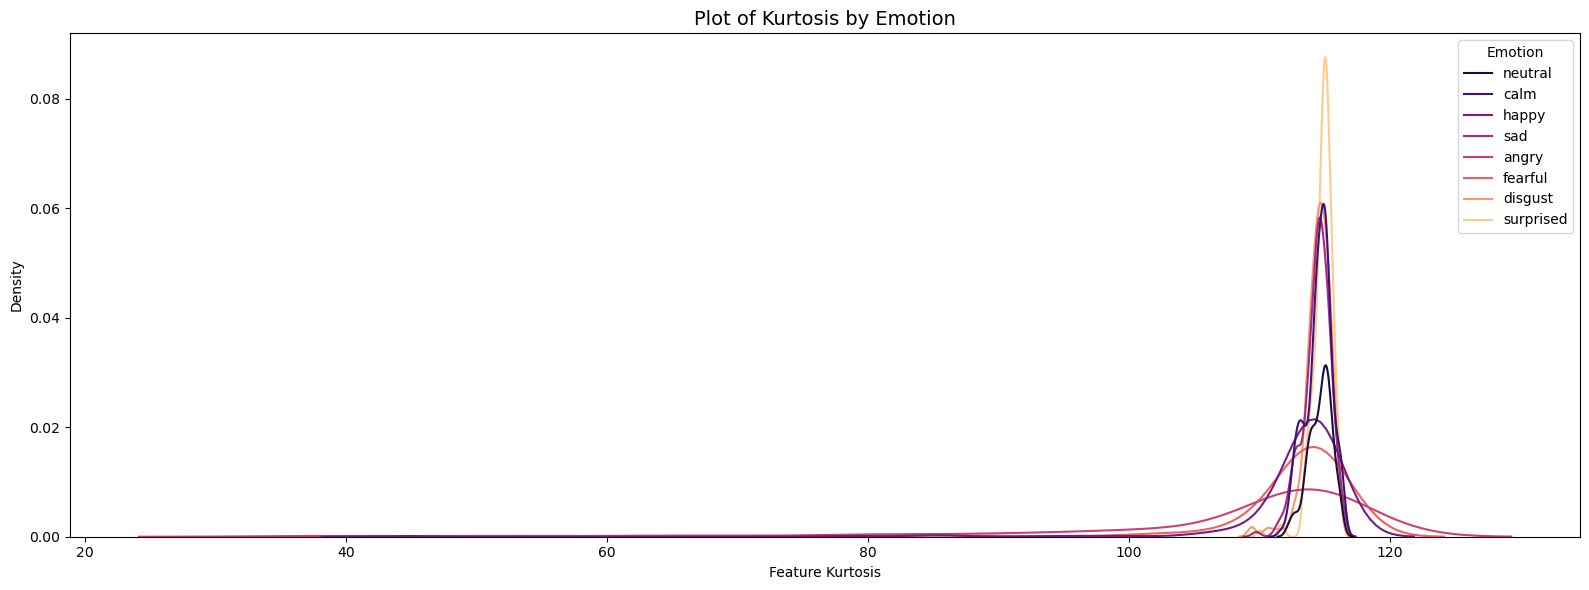

In [9]:
plt.figure(figsize=(16,6))
sns.kdeplot(x='Feature Kurtosis', hue="Emotion", data=df, palette='magma')
plt.title('Plot of Kurtosis by Emotion', fontsize=14)
plt.tight_layout()
plt.show()

# ✅ Conclusion
- Created **4 new statistical features** (*Mean, Standard Deviation, Skewness, Kurtosis*).   
- These engineered features may capture extra patterns in emotional speech. 
- Visualization showed how these features differ across emotions.  
- Feature engineering can improve model performance by giving it more descriptive inputs.